<a href="https://colab.research.google.com/github/Prajwal7387/spotify-music-clustering-project/blob/main/MINOR_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances, silhouette_score



In [ ]:
df = pd.read_csv("/content/spo.csv")
df = df.dropna()

# Remove duplicates to avoid repeated recommendations
df = df.drop_duplicates(subset=['track_name'])
df


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [ ]:
features = ['popularity','danceability','energy','loudness',
            'speechiness','acousticness','liveness','tempo']



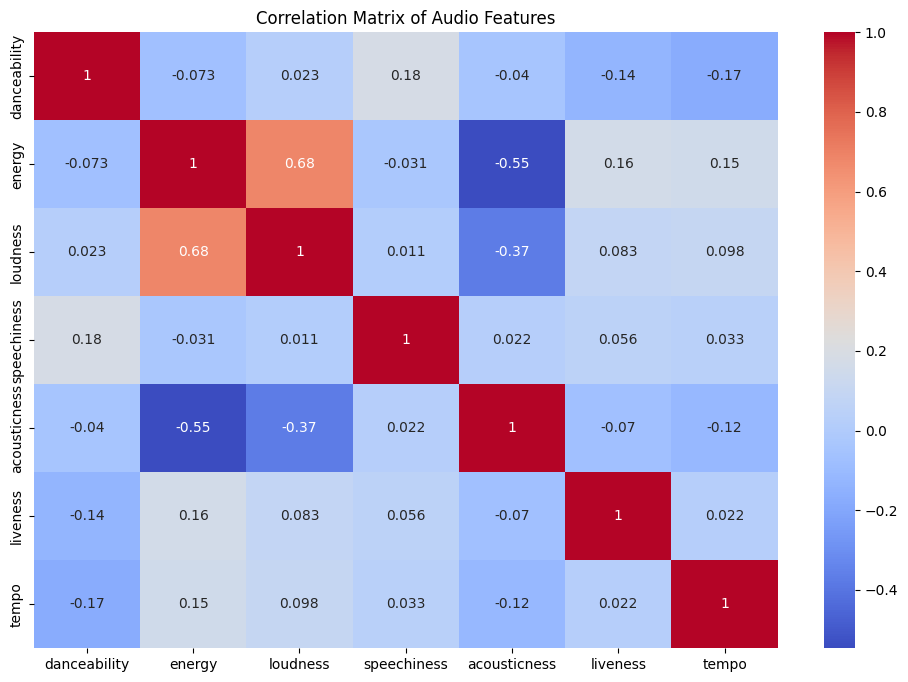

In [ ]:
plt.figure(figsize=(12,8))

# Filter features to only include columns present in df
existing_features = [col for col in features if col in df.columns]

sns.heatmap(df[existing_features].corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Matrix of Audio Features")
plt.show()

In [ ]:
X = StandardScaler().fit_transform(df[existing_features])

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

print("Silhouette Score:", round(silhouette_score(X, df['cluster']), 3))


Silhouette Score: 0.168


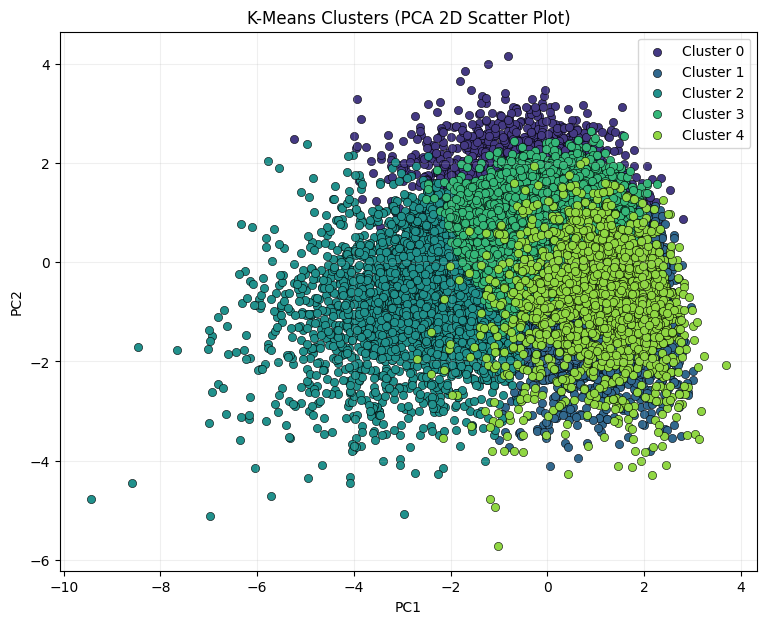

In [ ]:
pca = PCA(n_components=2)
pca_vals = pca.fit_transform(X)

plt.figure(figsize=(9,7))

clusters = sorted(df['cluster'].unique())
colors = sns.color_palette("viridis", len(clusters))

for c in clusters:
    plt.scatter(
        pca_vals[df['cluster']==c,0],
        pca_vals[df['cluster']==c,1],
        s=35,
        label=f"Cluster {c}",
        color=colors[c],
        edgecolor='black',
        linewidth=0.4
    )

plt.title("K-Means Clusters (PCA 2D Scatter Plot)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(alpha=0.2)
plt.show()


/tmp/ipython-input-1101851994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['cluster'], palette="viridis")


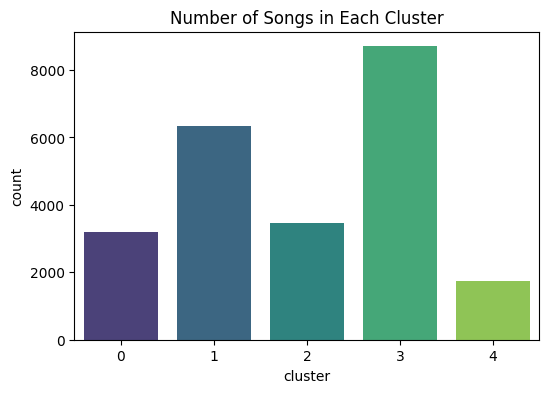

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['cluster'], palette="viridis")
plt.title("Number of Songs in Each Cluster")
plt.show()


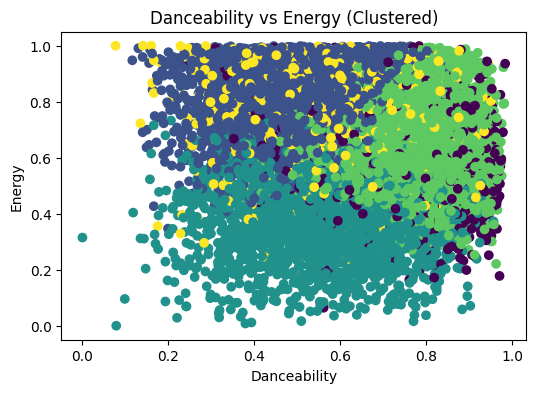

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['danceability'], df['energy'], c=df['cluster'], cmap='viridis')
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceability vs Energy (Clustered)")
plt.show()


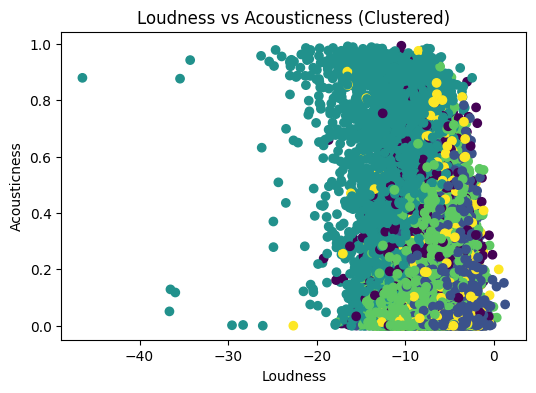

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['loudness'], df['acousticness'], c=df['cluster'], cmap='viridis')
plt.xlabel("Loudness")
plt.ylabel("Acousticness")
plt.title("Loudness vs Acousticness (Clustered)")
plt.show()


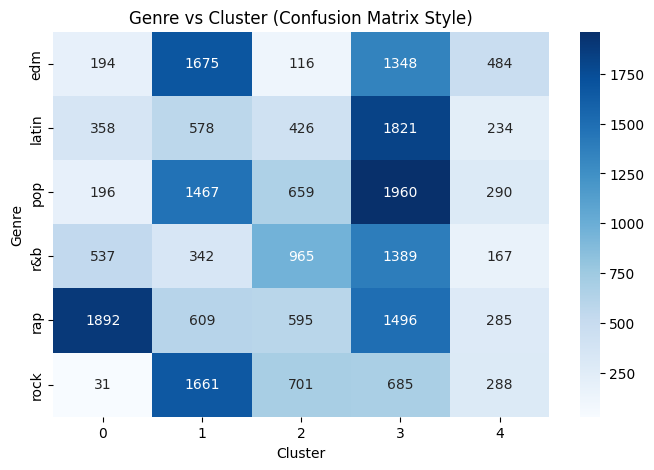

In [ ]:
if "playlist_genre" not in df.columns:
    df["playlist_genre"] = np.random.choice(["pop","rock","edm","latin","r&b"], len(df))
cm = pd.crosstab(df['playlist_genre'], df['cluster'])

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Genre vs Cluster (Confusion Matrix Style)")
plt.xlabel("Cluster")
plt.ylabel("Genre")
plt.show()


In [ ]:
cluster_profile = df.groupby('cluster')[existing_features].mean()
cluster_profile


,danceability,energy,loudness,speechiness,acousticness,liveness,tempo
cluster,,,,,,,
0,0.725965,0.664765,-6.922353,0.320334,0.186168,0.179224,121.088807
1,0.548071,0.828450,-5.129395,0.075829,0.069149,0.175468,138.334001
2,0.596965,0.422623,-10.813186,0.072565,0.547320,0.150016,113.588674
3,0.738921,0.702483,-6.670689,0.073527,0.128235,0.141795,111.414640
4,0.612275,0.791269,-5.969830,0.107741,0.115483,0.602908,121.515511


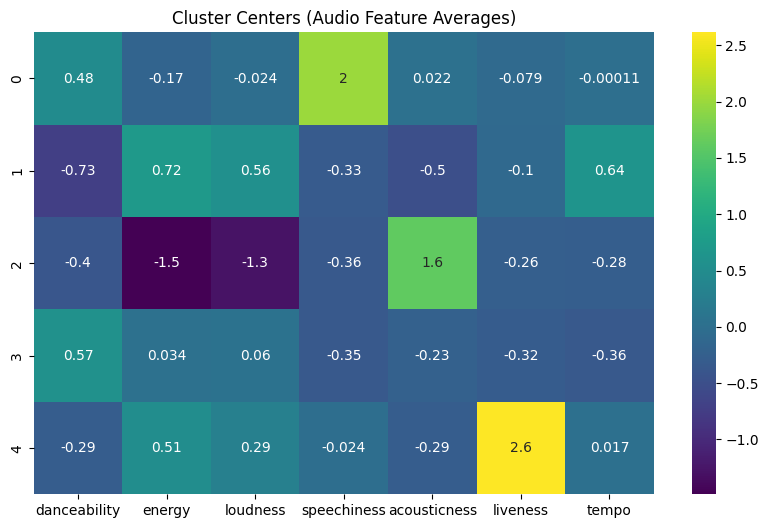

In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=existing_features)

plt.figure(figsize=(10,6))
sns.heatmap(centers, annot=True, cmap="viridis")
plt.title("Cluster Centers (Audio Feature Averages)")
plt.show()


In [ ]:
def recommend(song):
    if song not in df['track_name'].values:
        return ["Song not found"]

    target = df[df['track_name'] == song].iloc[0]
    same_cluster = df[df['cluster'] == target['cluster']]

    dist = pairwise_distances(
        target[existing_features].values.reshape(1,-1), # Changed 'features' to 'existing_features'
        same_cluster[existing_features].values # Changed 'features' to 'existing_features'
    )[0]

    idx = dist.argsort()[1:11]
    recs = same_cluster.iloc[idx]

    grouped = recs.groupby('track_name')['playlist_genre'].apply(
        lambda x: " / ".join(sorted(set(x)))
    )

    return [f"{name} — {genres}" for name, genres in grouped.items()]

In [ ]:
recommend("Senorita")



['I Was Born To Love You — edm',
 'It Never Rains in Southern California — rock',
 'Learning To Fly — rock',
 'Quien Eres Tu — rap',
 'Right Side of My Neck — pop',
 'Shake Your Body (Down to the Ground) — r&b',
 'Spring Love — latin',
 'Tether — pop',
 'Vogue - Edit — pop',
 'Your Silent Face - 2015 Remaster — rock']